In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
from wordcloud import WordCloud
import nltk
nltk.download(["stopwords",
               "punkt",
               "wordnet",
               "omw-1.4",
               "vader_lexicon"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Tokenizing words

In [51]:
simple_text = "This isn\'t a real text, this is an example text...Notice this contains punctuations!!!"

In [52]:
tokenizer = nltk.tokenize.RegexpTokenizer("[a-zA-Z0-9\"]+")
tokenized_doc = tokenizer.tokenize(simple_text)
print(tokenized_doc)

['This', 'isn', 't', 'a', 'real', 'text', 'this', 'is', 'an', 'example', 'text', 'Notice', 'this', 'contains', 'punctuations']


In [53]:
stop_words = nltk.corpus.stopwords.words("english")
print(stop_words[:10])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


Removing stop words

In [54]:
cleaned_tokens = []
for word in tokenized_doc:
  word = word.lower()
  if word not in stop_words:
    cleaned_tokens.append(word)
print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuations']


In [55]:
cleaned_tokens = [word.lower() for word in tokenized_doc if word.lower() not in stop_words]
print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuations']


Stemming and lemmatization

In [56]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ["cacti", "sings", "hopped", "rocks", "better", "easily"]
pos = ["n","v", "v", "n", "a" , "r"]
lemmatized_words = [lemmatizer.lemmatize(words[i], pos = pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]
print("Lemmatized words:", lemmatized_words)
print("Stemmed words:", stemmed_words)

Lemmatized words: ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words: ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [57]:
stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]
print(stemmed_text)


['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


Writing a function to apply all data pre-processing

In [58]:
def preprocess_text(text):
  tokenized_doc = nltk.tokenize.RegexpTokenizer("[a-zA-Z0-9\"]+").tokenize(text)
  cleaned_tokens = [word.lower() for word in tokenized_doc if word.lower() not in stop_words]
  stemmed_words = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_words


In [60]:
data = pd.read_csv("SMSSpamCollection.txt", sep = "\t", header=None)
data.columns = ["Target_Label", "Text"]

In [61]:
data.head()

,Target_Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
print("\n All Data Labels")
print(data.groupby("Target_Label").count())


 All Data Labels
              Text
Target_Label      
ham           4825
spam           747


In [64]:
data["Text"] = data["Text"].apply(preprocess_text)
data.head()

,Target_Label,Text
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"[nah, think, goe, usf, live, around, though]"


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["Text"].map("".join))
X = pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5230,5231,5232,5233,5234,5235,5236,5237,5238,5239
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
from sklearn.model_selection import train_test_split
y= data["Target_Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size =0.2, random_state =99)

<Axes: xlabel='Target_Label', ylabel='count'>

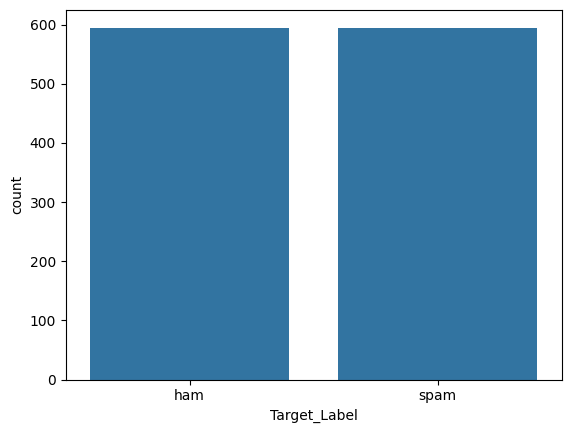

In [67]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

sns.countplot(x = y_train_undersampled)

In [68]:
from sklearn.naive_bayes import MultinomialNB

model_0 = MultinomialNB()
model_0.fit(X_train_undersampled, y_train_undersampled)

MultinomialNB()

In [69]:
y_pred = model_0.predict(X_test)

In [70]:
y_pred

array(['spam', 'spam', 'spam', ..., 'ham', 'spam', 'spam'], dtype='<U4')

In [71]:
y_test

,Target_Label
1661,ham
2718,ham
2409,ham
2385,ham
1462,ham
...,...
3044,ham
94,ham
5301,ham
2282,ham


In [72]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:%2f\n\n" %(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm, "\n\n")
print("----------------------------------------")
result = metrics.classification_report(y_test, y_pred)
print("Classification Report")
print(result)

Accuracy:0.170404


Confusion Matrix
[[ 38 925]
 [  0 152]] 


----------------------------------------
Classification Report
              precision    recall  f1-score   support

         ham       1.00      0.04      0.08       963
        spam       0.14      1.00      0.25       152

    accuracy                           0.17      1115
   macro avg       0.57      0.52      0.16      1115
weighted avg       0.88      0.17      0.10      1115

